# COVID-19 ASMR Correlation Analysis - Philippine Provinces (Version 2)

**NEW: COVID-19 Tests Performed / Population * 100,000**

Age-Standardized Mortality Rates (ASMR) allows the ranking of geographical areas with varying age structures according to mortality rates. It is computed by setting a standard population and using its age distribution as the weight. ASMR eliminates the age confounder which is present in COVID-19 (biased against the elderly).

The objective of this notebook are as follows: 
1. Compute the correlation between ASMR and the following variables (province-level): 
    - Poverty Incidence 
    - Hospital Beds per 100,000 population 
    - Population Density
    - Elderly Population
    - COVID-19 Tests Performed **[NEW]**
2. Compute the P-value of the correlations found; And,
3. Visualize the correlation between variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
sns.set_context("paper")

## Datasets

### Poverty Incidence (2021)

In [3]:
poverty = pd.read_excel('../data/Poverty Incidence/Poverty Incidence Among Population 2021.xlsx', index_col=0)
poverty.head()

,Poverty Incidence
PROVINCE,
ABRA,21.5
AGUSAN DEL NORTE,30.8
AGUSAN DEL SUR,41.3
AKLAN,20.2
ALBAY,20.4


In [4]:
poverty = poverty.rename(columns={'Poverty Incidence': 'Poverty Incidence (2021)'})
poverty.head()

,Poverty Incidence (2021)
PROVINCE,
ABRA,21.5
AGUSAN DEL NORTE,30.8
AGUSAN DEL SUR,41.3
AKLAN,20.2
ALBAY,20.4


### Hospital Beds per 100,000 population (2022)

In [5]:
beds = pd.read_excel('../data/Hospital Beds/hospital_beds_by_province_2022.xlsx', index_col=0)
beds.head()

,private_beds,government_beds,total_beds,population,beds_per_100000_private,beds_per_100000_government,beds_per_100000_total
PROVINCE,,,,,,,
ABRA,41,50,91,250309,16.379755,19.975311,36.355065
AGUSAN DEL NORTE,348,250,598,757121,45.963591,33.019821,78.983412
AGUSAN DEL SUR,80,180,260,737991,10.840241,24.390541,35.230782
AKLAN,305,300,605,612985,49.756519,48.940839,98.697358
ALBAY,558,375,933,1372550,40.654257,27.321409,67.975666


In [6]:
beds = beds[['beds_per_100000_total']]
beds = beds.rename(columns={'beds_per_100000_total': 'Hospital Beds per 100k (2022)'})
beds.head()

,Hospital Beds per 100k (2022)
PROVINCE,
ABRA,36.355065
AGUSAN DEL NORTE,78.983412
AGUSAN DEL SUR,35.230782
AKLAN,98.697358
ALBAY,67.975666


### Population Density (2020)

In [7]:
density = pd.read_excel('../data/Population Density/Population Density 2020.xlsx', index_col=0)
density.head()

,Population Density,Remarks
PROVINCE,,
NCR,21765.280692,NaN
ABRA,59.762317,NaN
APAYAO,27.622587,NaN
BENGUET,292.593195,Including Baguio City
IFUGAO,79.257910,NaN


In [8]:
density = density[['Population Density']].rename(columns={'Population Density': 'Population Density (2020)'})
density.head()

,Population Density (2020)
PROVINCE,
NCR,21765.280692
ABRA,59.762317
APAYAO,27.622587
BENGUET,292.593195
IFUGAO,79.257910


### Elderly Population (65 and above)

In [9]:
population = pd.read_excel('../data/Philippine Population 2020 by Province and Age Group.xlsx', index_col=0)
population.head()

,0 to 4,5 to 9,10 to 14,15 to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 64,65 to 69,70 to 74,75 to 79,80+
BASILAN,63979,61636,56582,45050,40105,34417,27226,23655,19508,16292,12212,8616,6256,4528,2411,1320,1318
COTABATO CITY (NOT A PROVINCE),38216,35974,34523,35957,36567,32404,24889,20741,17727,13937,10973,7678,5916,3891,2535,1239,1372
LANAO DEL SUR,182925,160576,156233,137554,123810,101418,75871,63633,55861,44624,32651,20800,15346,10967,5999,3125,3114
MAGUINDANAO,223251,193100,179050,138736,124325,106176,89110,76435,66797,50553,34625,22091,15534,10130,5886,3036,2979
SULU,130431,135390,130518,122121,100731,84344,62854,58477,50591,42671,28650,18751,13046,9290,5469,2727,2614


In [10]:
province_total = population.sum(axis=1)
province_total

BASILAN                            425111
COTABATO CITY (NOT A PROVINCE)     324539
LANAO DEL SUR                     1194507
MAGUINDANAO                       1341814
SULU                               998675
                                   ...   
DAVAO ORIENTAL                     574984
COTABATO (NORTH COTABATO)         1273594
SARANGANI                          558069
SOUTH COTABATO                    1668556
SULTAN KUDARAT                     851554
Length: 85, dtype: int64

In [11]:
province_elderly = population[['65 to 69', '70 to 74', '75 to 79', '80+']].sum(axis=1)
province_elderly

BASILAN                            9577
COTABATO CITY (NOT A PROVINCE)     9037
LANAO DEL SUR                     23205
MAGUINDANAO                       22031
SULU                              20100
                                  ...  
DAVAO ORIENTAL                    32292
COTABATO (NORTH COTABATO)         61877
SARANGANI                         22037
SOUTH COTABATO                    72462
SULTAN KUDARAT                    35687
Length: 85, dtype: int64

In [12]:
elderly = province_elderly / province_total * 100
elderly

BASILAN                           2.252823
COTABATO CITY (NOT A PROVINCE)    2.784565
LANAO DEL SUR                     1.942642
MAGUINDANAO                       1.641882
SULU                              2.012667
                                    ...   
DAVAO ORIENTAL                    5.616156
COTABATO (NORTH COTABATO)         4.858456
SARANGANI                         3.948795
SOUTH COTABATO                    4.342797
SULTAN KUDARAT                    4.190809
Length: 85, dtype: float64

In [13]:
elderly = elderly.reset_index().rename(columns={'index': 'PROVINCE', 0: 'Elderly (65 and above) % (2020)'}).set_index('PROVINCE')
elderly

,Elderly (65 and above) % (2020)
PROVINCE,
BASILAN,2.252823
COTABATO CITY (NOT A PROVINCE),2.784565
LANAO DEL SUR,1.942642
MAGUINDANAO,1.641882
SULU,2.012667
...,...
DAVAO ORIENTAL,5.616156
COTABATO (NORTH COTABATO),4.858456
SARANGANI,3.948795


In [14]:
elderly.to_excel('../data/Elderly Percentage (2020).xlsx')

In [15]:
# Dropping Interim Province 
elderly = elderly.drop('INTERIM PROVINCE')
elderly

,Elderly (65 and above) % (2020)
PROVINCE,
BASILAN,2.252823
COTABATO CITY (NOT A PROVINCE),2.784565
LANAO DEL SUR,1.942642
MAGUINDANAO,1.641882
SULU,2.012667
...,...
DAVAO ORIENTAL,5.616156
COTABATO (NORTH COTABATO),4.858456
SARANGANI,3.948795


### COVID-19 Tests Performed

In [20]:
tests = "/Users/jimuelcelestejr/Documents/codebook/covid-asmr-philippines/data/COVID-19 Tests/tests_by_province_per_100k.csv"
tests = pd.read_csv(tests, index_col=0)
tests.head()

,Population,Cumulative Samples Tested,Tests / Population,Tests / Population per 100k (2019-2023)
PROVINCE,,,,
BASILAN,425111,0.0,0.000000,0.000000
COTABATO CITY (NOT A PROVINCE),324539,304663.0,0.938756,93875.620496
LANAO DEL SUR,1194507,83750.0,0.070113,7011.260713
MAGUINDANAO,1341814,923.0,0.000688,68.787477
SULU,998675,0.0,0.000000,0.000000


In [28]:
tests = tests['Tests / Population per 100k (2019-2023)']
tests = tests.reset_index()
tests = tests.rename(columns={"Tests / Population per 100k (2019-2023)": "COVID-19 Tests per 100k (2019-23)"})
tests = tests.set_index("PROVINCE")
tests

,COVID-19 Tests per 100k (2019-23)
PROVINCE,
BASILAN,0.000000
COTABATO CITY (NOT A PROVINCE),93875.620496
LANAO DEL SUR,7011.260713
MAGUINDANAO,68.787477
SULU,0.000000
...,...
DAVAO ORIENTAL,0.000000
COTABATO (NORTH COTABATO),310.145933
SARANGANI,0.000000


### Crude and Age-Standardized Mortality Rates

In [33]:
mr = pd.read_excel('../results/province_CMR and ASMR per 100 000 by Province.xlsx')
mr = mr.rename(columns={
    'Unnamed: 0': 'PROVINCE',
    'crude_mortality_rate_per_100k': 'CMR', 
    'age_standardized_mortality_rate_per_100k': 'ASMR', 
    'difference': 'Difference (CMR-ASMR)'})
mr = mr.set_index('PROVINCE')
mr = mr.drop(['mortality', 'population'], axis=1)
mr.head()

,CMR,ASMR,Difference (CMR-ASMR)
PROVINCE,,,
TAWI-TAWI,1.368161,2.221281,-0.853120
SULU,1.401857,2.628742,-1.226885
MASBATE,4.411452,4.819455,-0.408003
MISAMIS OCCIDENTAL,9.594260,7.720111,1.874149
CAMARINES NORTE,8.587691,8.697143,-0.109453


In [34]:
mr.shape

(84, 3)

### Merged Dataset

In [35]:
datasets = [poverty, beds, density, elderly, tests]
for dataset in datasets:
    mr = mr.merge(dataset, how='outer', on='PROVINCE')
mr.head()

,CMR,ASMR,Difference (CMR-ASMR),Poverty Incidence (2021),Hospital Beds per 100k (2022),Population Density (2020),Elderly (65 and above) % (2020),COVID-19 Tests per 100k (2019-23)
PROVINCE,,,,,,,,
TAWI-TAWI,1.368161,2.221281,-0.853120,36.5,43.325086,121.403538,2.235802,0.000000
SULU,1.401857,2.628742,-1.226885,62.5,25.033169,219.941238,2.012667,0.000000
MASBATE,4.411452,4.819455,-0.408003,27.7,15.991512,219.622284,5.321093,0.000000
MISAMIS OCCIDENTAL,9.594260,7.720111,1.874149,24.7,148.629728,307.646651,7.135040,4291.561441
CAMARINES NORTE,8.587691,8.697143,-0.109453,22.2,77.607279,276.434746,5.485626,0.000000


In [36]:
mr.index

Index(['TAWI-TAWI', 'SULU', 'MASBATE', 'MISAMIS OCCIDENTAL', 'CAMARINES NORTE',
       'SARANGANI', 'CAMIGUIN', 'SULTAN KUDARAT', 'SOUTHERN LEYTE',
       'CATANDUANES', 'BATANES', 'EASTERN SAMAR', 'NORTHERN SAMAR', 'BUKIDNON',
       'COTABATO (NORTH COTABATO)', 'SORSOGON', 'LEYTE',
       'SAMAR (WESTERN SAMAR)', 'BASILAN', 'QUEZON', 'MAGUINDANAO',
       'ZAMBOANGA SIBUGAY', 'ROMBLON', 'ALBAY', 'CAMARINES SUR',
       'ZAMBOANGA DEL NORTE', 'SIQUIJOR', 'BILIRAN', 'MISAMIS ORIENTAL',
       'BOHOL', 'AKLAN', 'MARINDUQUE', 'ILOCOS SUR', 'PALAWAN', 'BATANGAS',
       'DAVAO OCCIDENTAL', 'CAVITE', 'OCCIDENTAL MINDORO', 'LANAO DEL SUR',
       'ANTIQUE', 'LANAO DEL NORTE', 'DINAGAT ISLANDS', 'NEGROS ORIENTAL',
       'CAPIZ', 'ABRA', 'PANGASINAN', 'AGUSAN DEL SUR', 'LAGUNA',
       'DAVAO ORIENTAL', 'NUEVA ECIJA', 'ORIENTAL MINDORO', 'TARLAC',
       'ZAMBOANGA DEL SUR', 'CITY OF ISABELA (NOT A PROVINCE)', 'DAVAO DE ORO',
       'ILOCOS NORTE', 'BULACAN', 'RIZAL', 'SURIGAO DEL NORTE', 'L

In [39]:
mr = mr.drop('INTERIM PROVINCE')
mr

,CMR,ASMR,Difference (CMR-ASMR),Poverty Incidence (2021),Hospital Beds per 100k (2022),Population Density (2020),Elderly (65 and above) % (2020),COVID-19 Tests per 100k (2019-23)
PROVINCE,,,,,,,,
TAWI-TAWI,1.368161,2.221281,-0.853120,36.5,43.325086,121.403538,2.235802,0.000000
SULU,1.401857,2.628742,-1.226885,62.5,25.033169,219.941238,2.012667,0.000000
MASBATE,4.411452,4.819455,-0.408003,27.7,15.991512,219.622284,5.321093,0.000000
MISAMIS OCCIDENTAL,9.594260,7.720111,1.874149,24.7,148.629728,307.646651,7.135040,4291.561441
CAMARINES NORTE,8.587691,8.697143,-0.109453,22.2,77.607279,276.434746,5.485626,0.000000
...,...,...,...,...,...,...,...,...
QUIRINO,118.901390,115.119705,3.781686,9.1,92.861003,87.869774,5.531371,0.000000
NUEVA VIZCAYA,132.314025,121.070666,11.243359,15.3,142.182195,103.332862,6.116855,0.000000
BATAAN,136.303446,137.883440,-1.579994,11.6,118.176735,621.548020,5.305829,34312.214931


In [40]:
mr.shape

(84, 8)

82 provinces + 2 cities

In [41]:
output_file = '/Users/jimuelcelestejr/Documents/codebook/covid-asmr-philippines/data/correlation_analysis.csv'
mr.to_csv(output_file)

## Spearman's Rank Correlation Coefficient

"For nonnormally distributed continuous data, for ordinal data, **or for data with relevant outliers**, a Spearman rank correlation can be used as a measure of a monotonic association ([Schober et al., 2018](https://www.doi.org/10.1213/ANE.0000000000002864))."

In [42]:
correlation = mr.corr(method='spearman')
correlation

,CMR,ASMR,Difference (CMR-ASMR),Poverty Incidence (2021),Hospital Beds per 100k (2022),Population Density (2020),Elderly (65 and above) % (2020),COVID-19 Tests per 100k (2019-23)
CMR,1.000000,0.965050,0.369242,-0.547969,0.347173,0.097074,0.211299,0.435921
ASMR,0.965050,1.000000,0.153204,-0.491047,0.334705,0.111329,-0.005406,0.461353
Difference (CMR-ASMR),0.369242,0.153204,1.000000,-0.302319,0.134209,-0.122952,0.904890,-0.005293
Poverty Incidence (2021),-0.547969,-0.491047,-0.302319,1.000000,-0.448287,-0.288377,-0.250804,-0.347366
Hospital Beds per 100k (2022),0.347173,0.334705,0.134209,-0.448287,1.000000,0.315562,0.151841,0.520935
Population Density (2020),0.097074,0.111329,-0.122952,-0.288377,0.315562,1.000000,-0.003868,0.517530
Elderly (65 and above) % (2020),0.211299,-0.005406,0.904890,-0.250804,0.151841,-0.003868,1.000000,-0.014217
COVID-19 Tests per 100k (2019-23),0.435921,0.461353,-0.005293,-0.347366,0.520935,0.517530,-0.014217,1.000000


In [43]:
correlation.style.background_gradient(cmap="Blues")

,CMR,ASMR,Difference (CMR-ASMR),Poverty Incidence (2021),Hospital Beds per 100k (2022),Population Density (2020),Elderly (65 and above) % (2020),COVID-19 Tests per 100k (2019-23)
CMR,1.000000,0.965050,0.369242,-0.547969,0.347173,0.097074,0.211299,0.435921
ASMR,0.965050,1.000000,0.153204,-0.491047,0.334705,0.111329,-0.005406,0.461353
Difference (CMR-ASMR),0.369242,0.153204,1.000000,-0.302319,0.134209,-0.122952,0.904890,-0.005293
Poverty Incidence (2021),-0.547969,-0.491047,-0.302319,1.000000,-0.448287,-0.288377,-0.250804,-0.347366
Hospital Beds per 100k (2022),0.347173,0.334705,0.134209,-0.448287,1.000000,0.315562,0.151841,0.520935
Population Density (2020),0.097074,0.111329,-0.122952,-0.288377,0.315562,1.000000,-0.003868,0.517530
Elderly (65 and above) % (2020),0.211299,-0.005406,0.904890,-0.250804,0.151841,-0.003868,1.000000,-0.014217
COVID-19 Tests per 100k (2019-23),0.435921,0.461353,-0.005293,-0.347366,0.520935,0.517530,-0.014217,1.000000


/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_26960/779438660.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


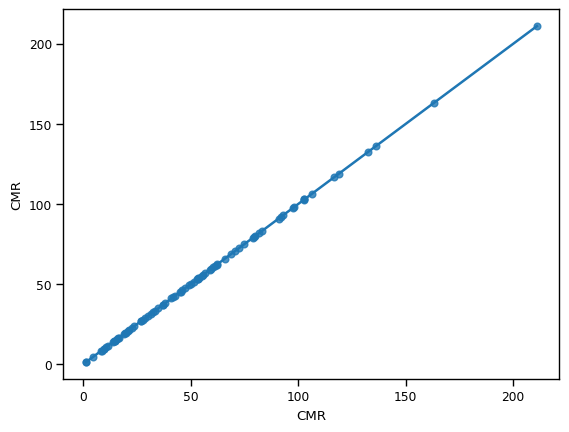

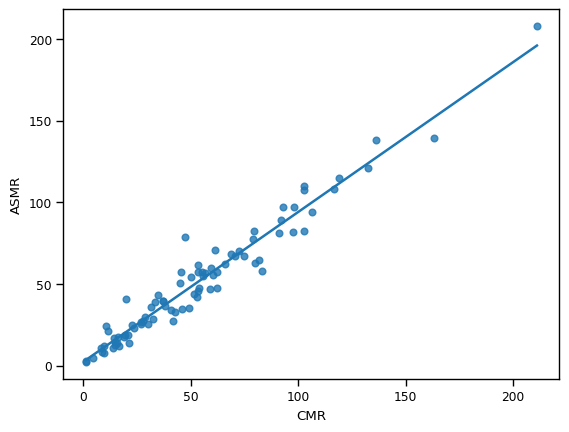

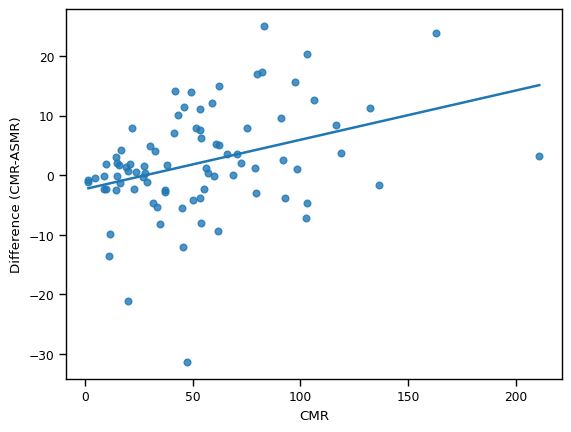

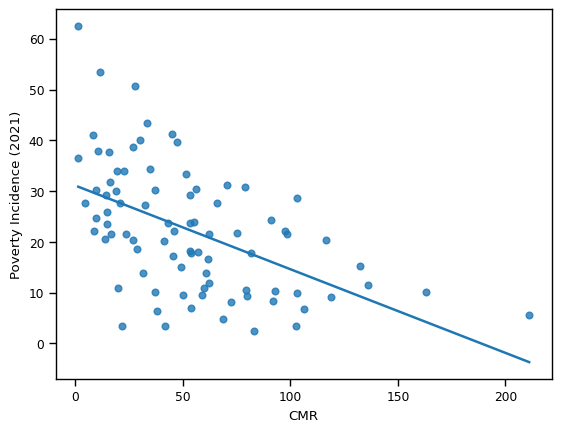

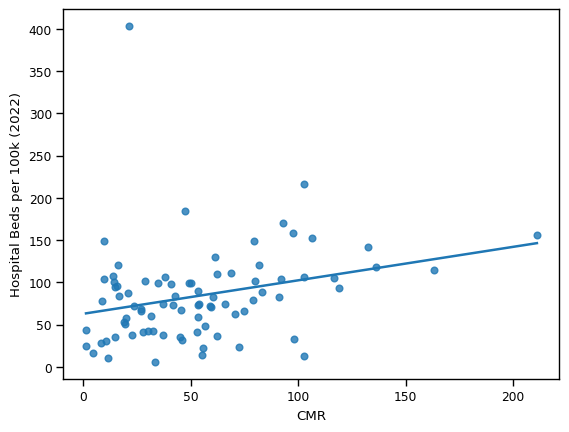

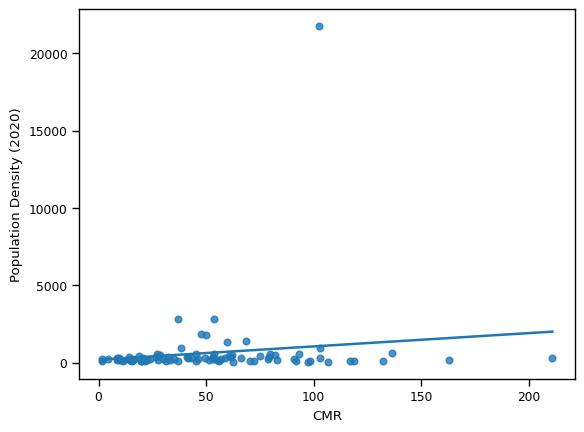

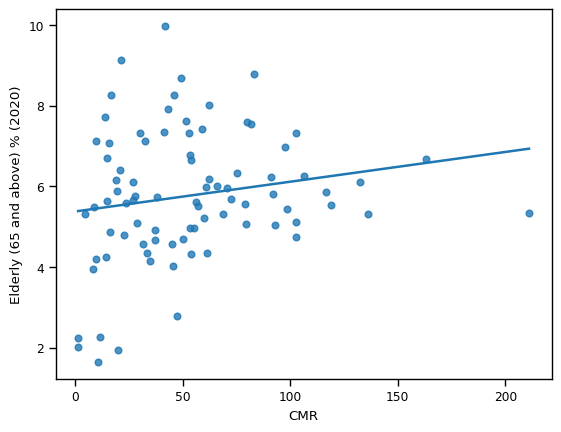

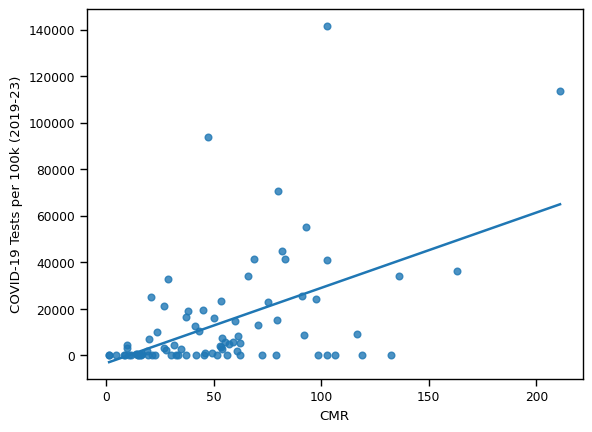

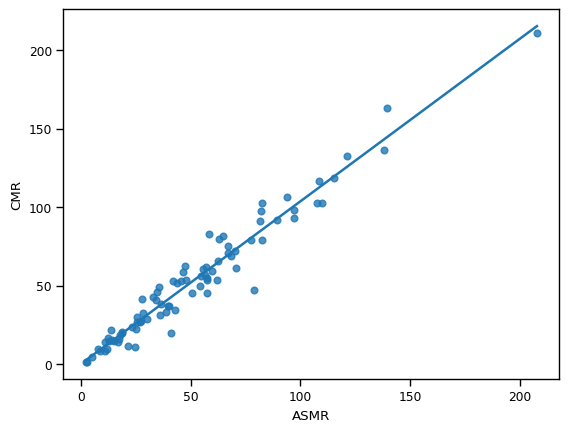

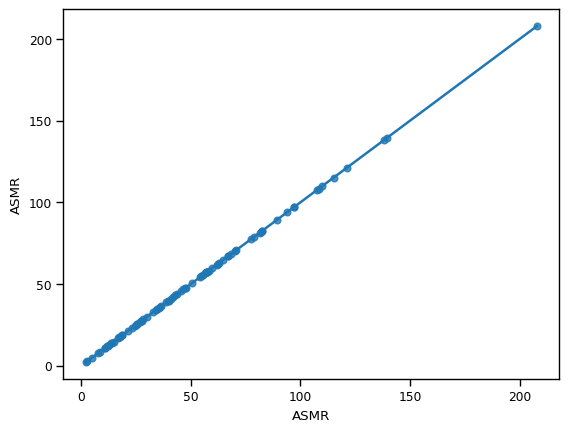

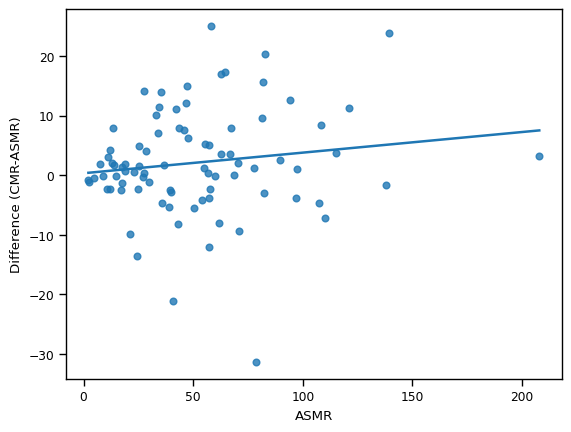

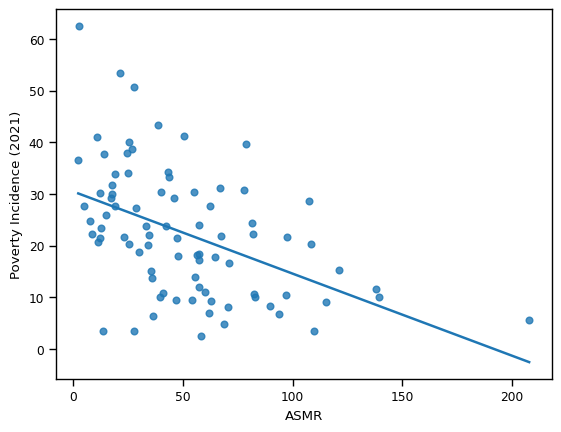

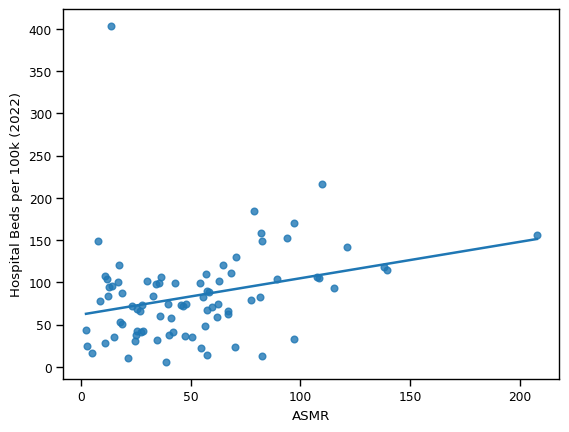

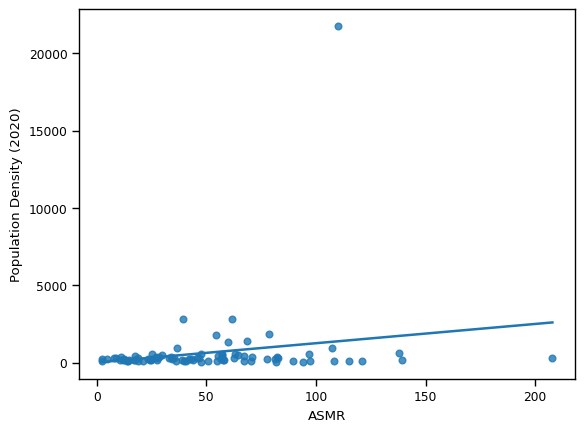

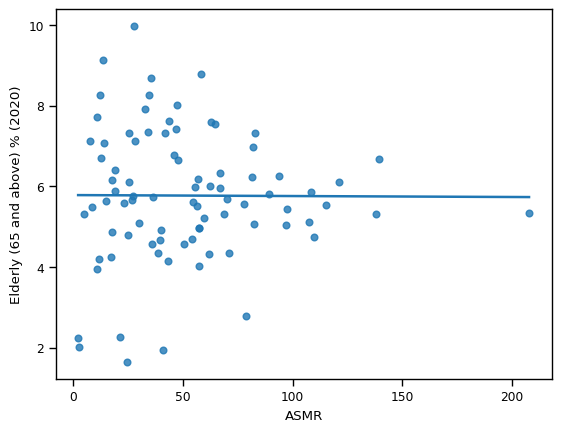

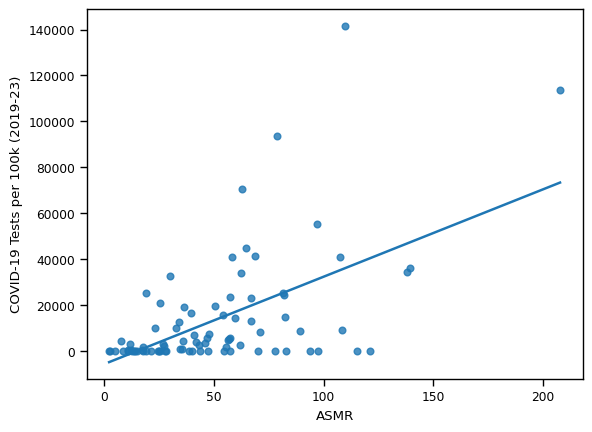

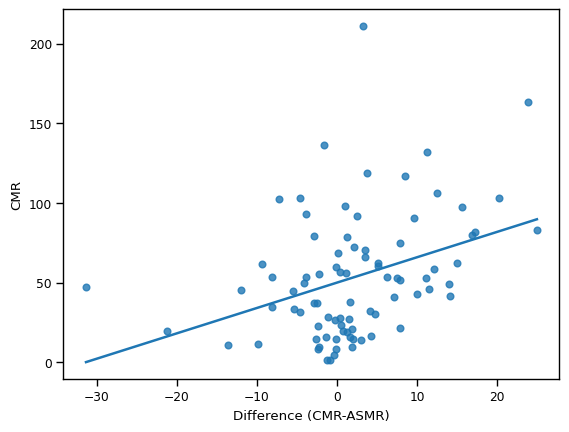

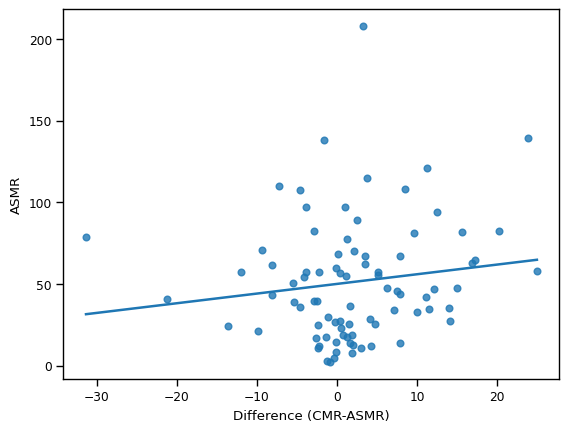

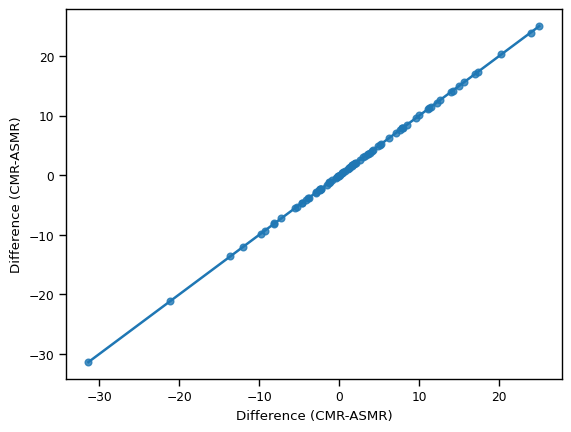

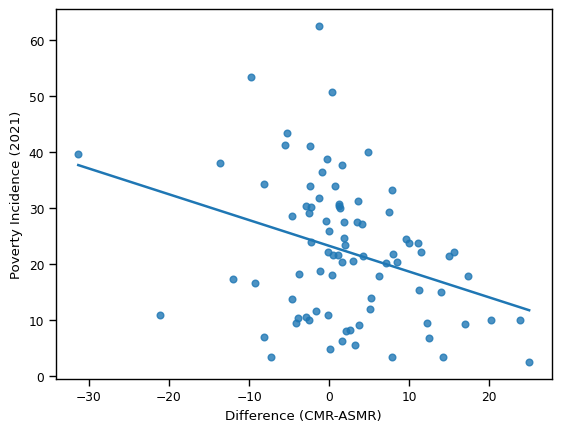

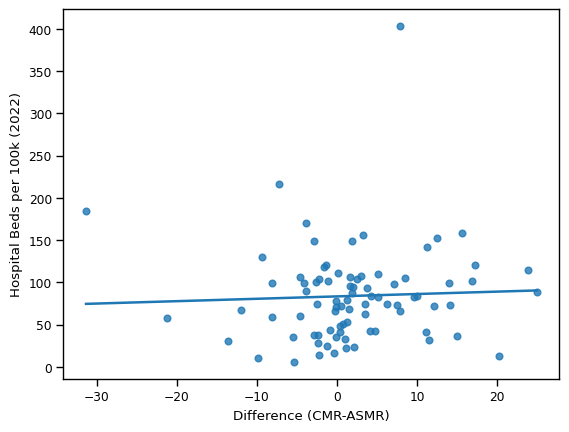

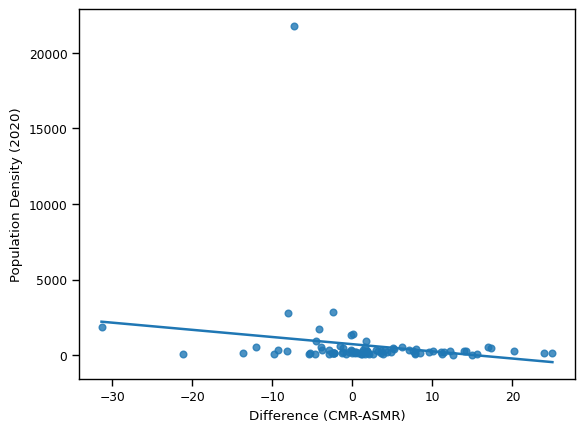

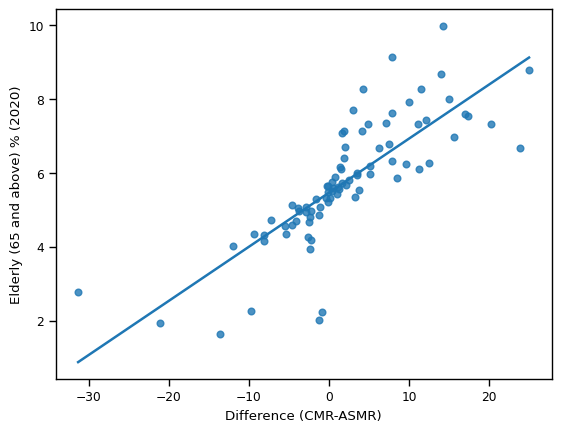

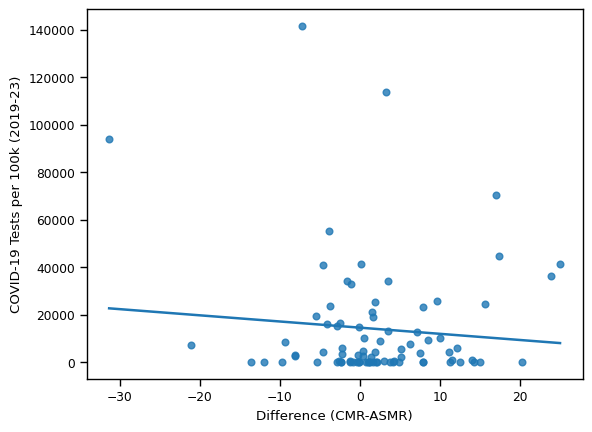

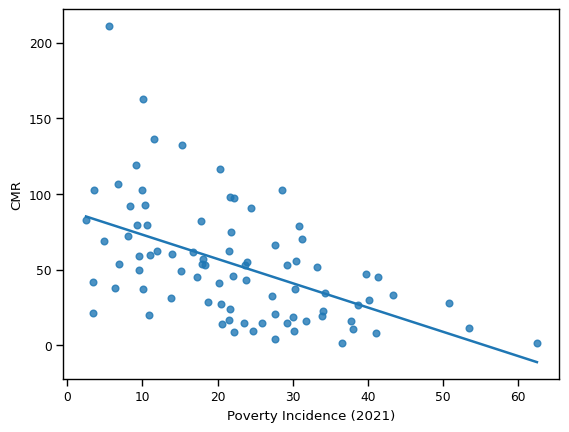

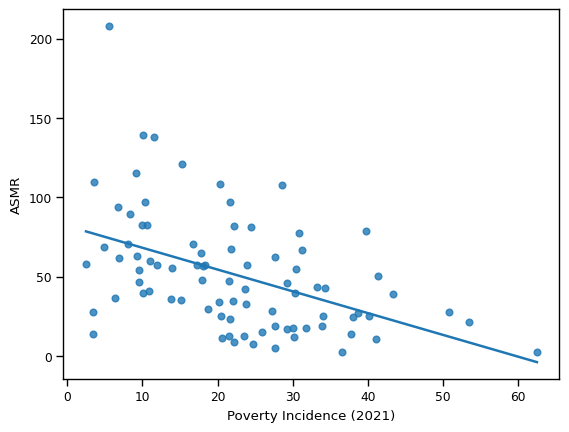

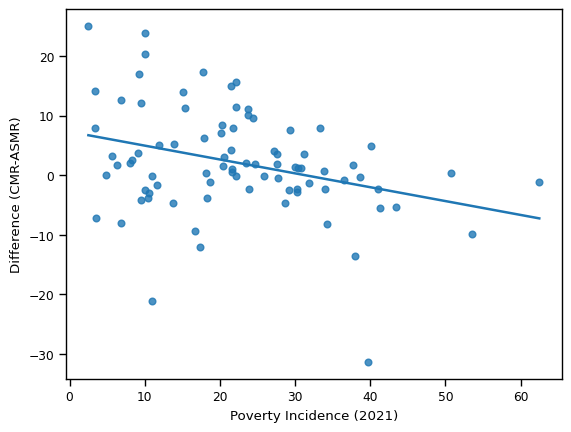

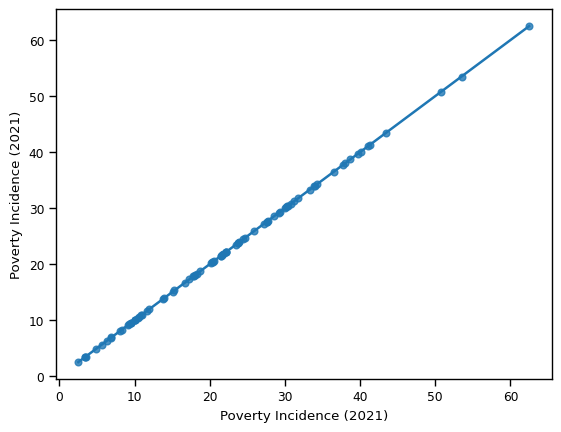

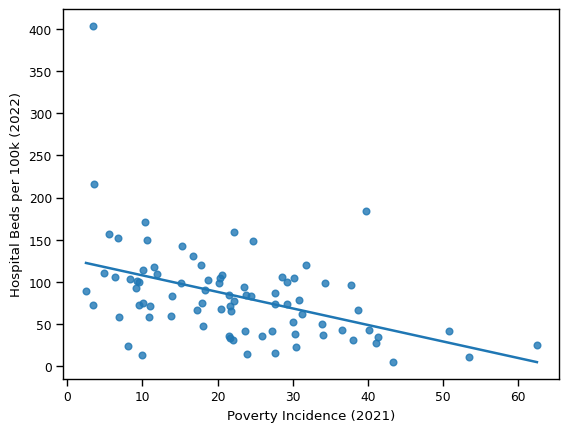

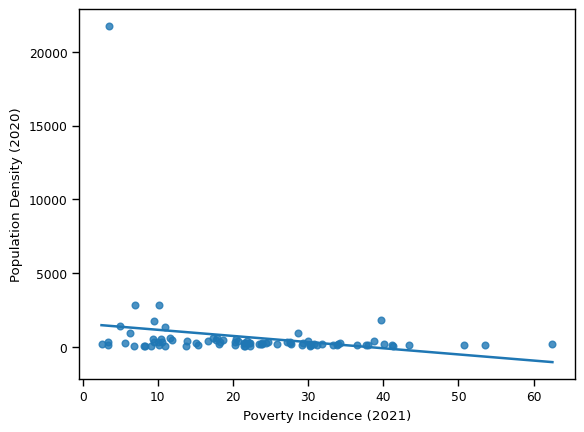

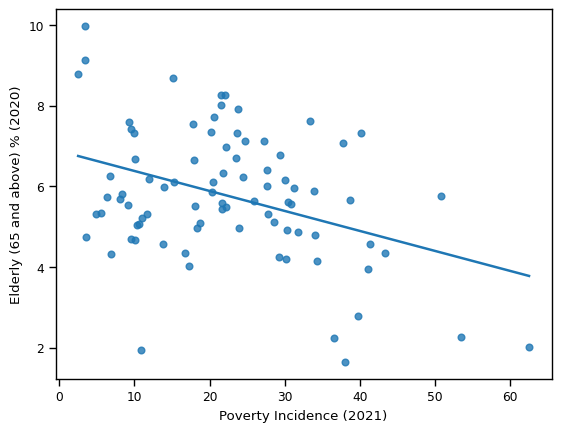

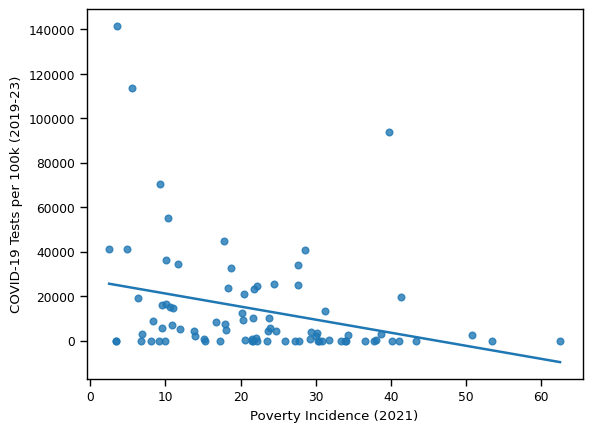

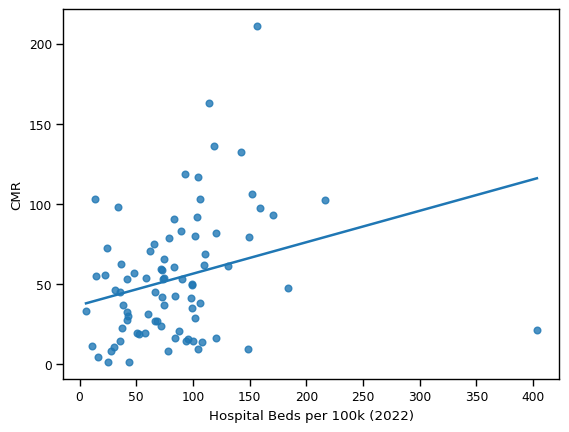

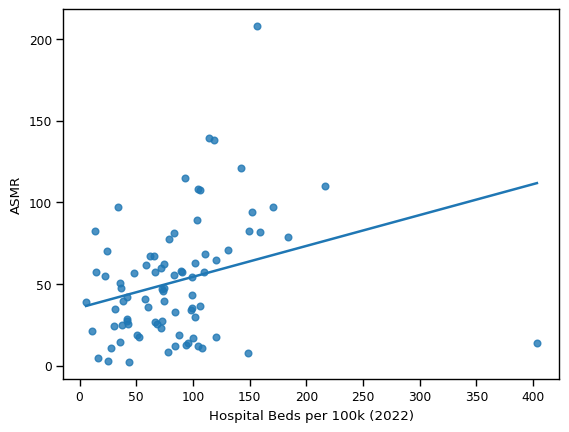

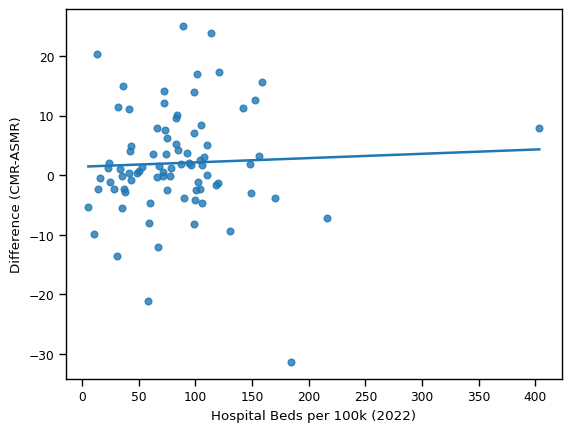

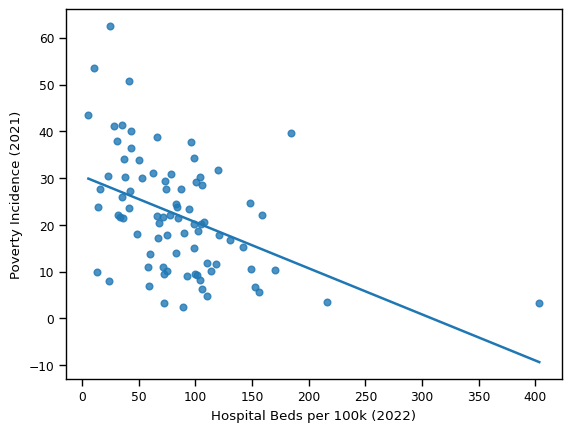

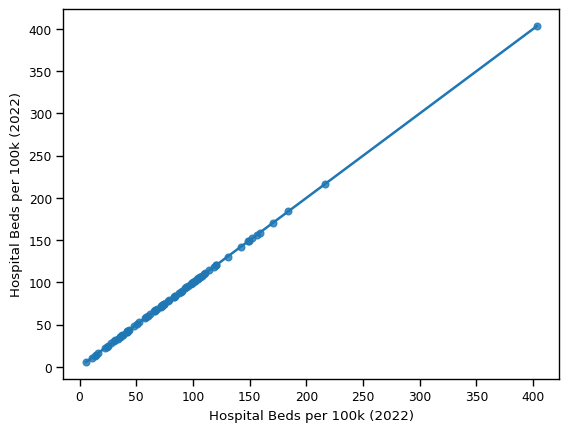

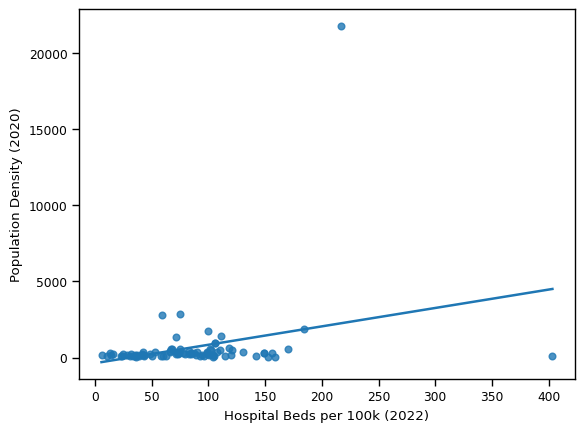

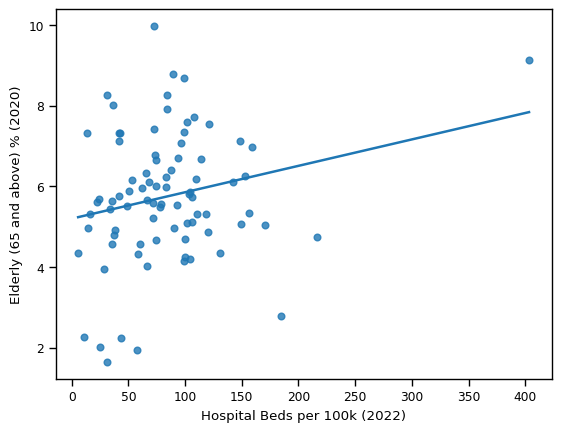

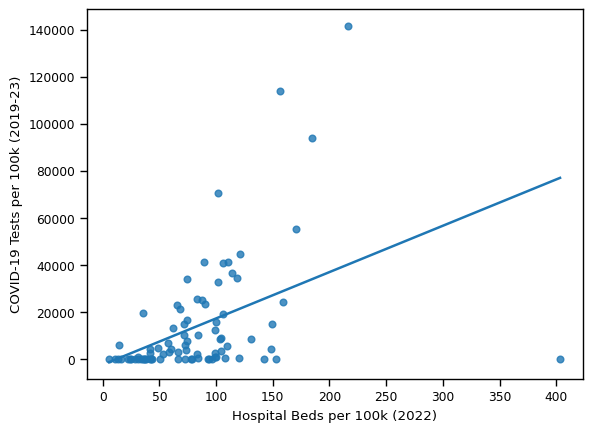

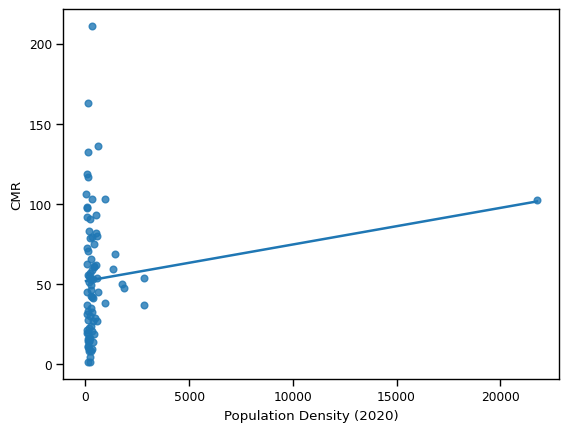

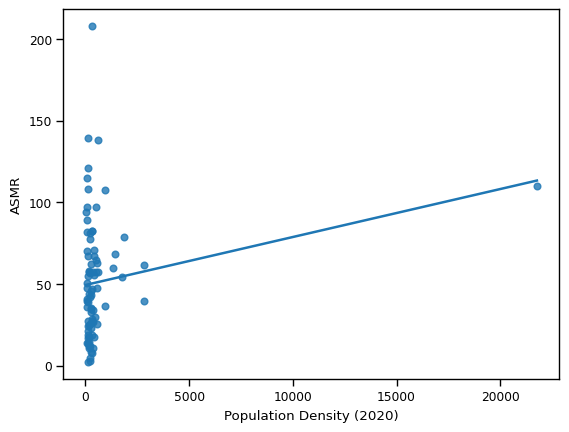

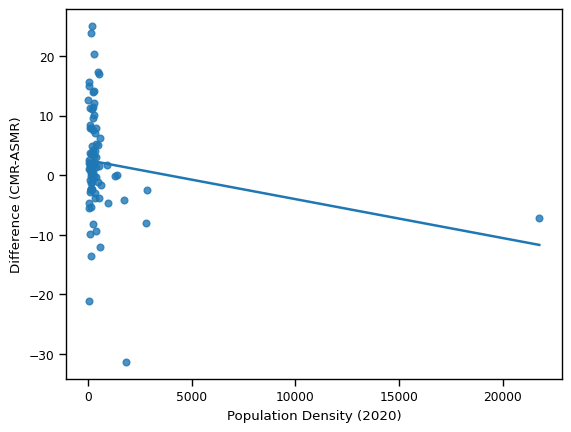

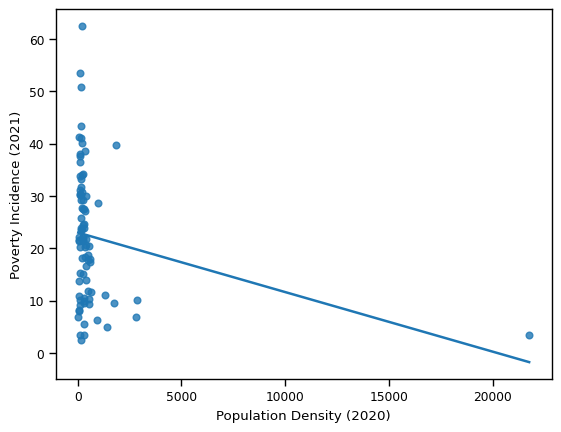

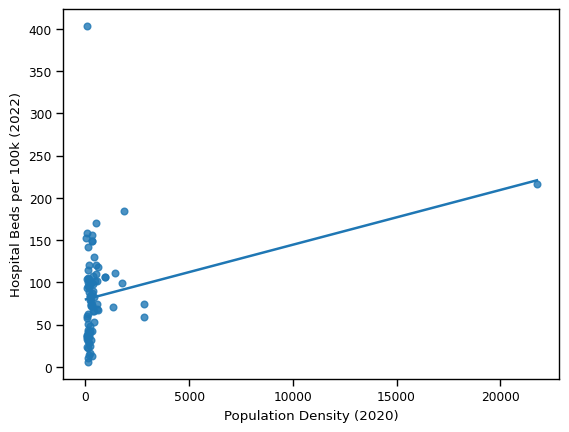

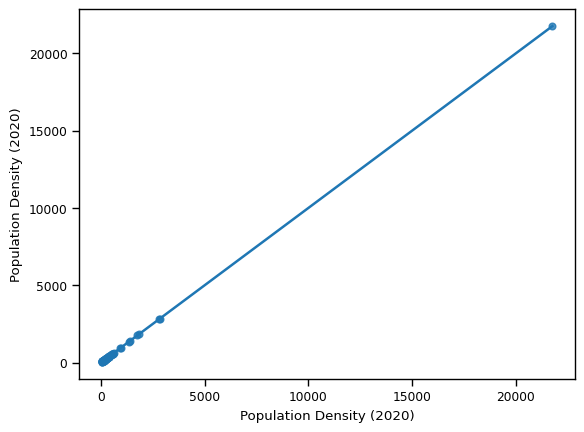

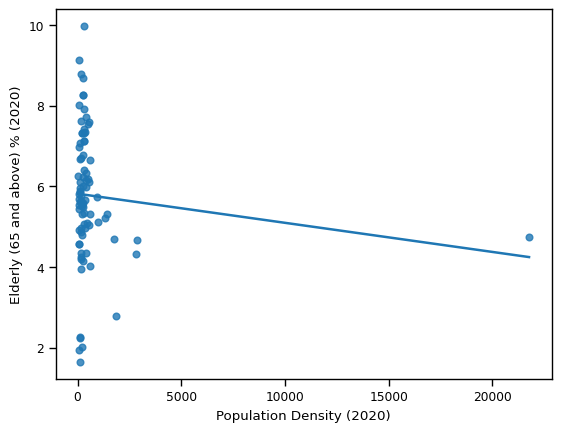

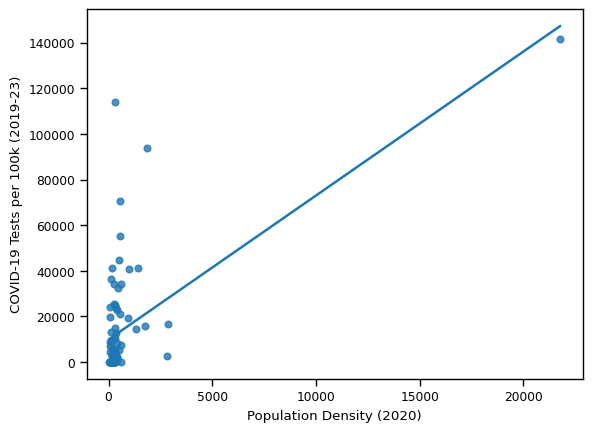

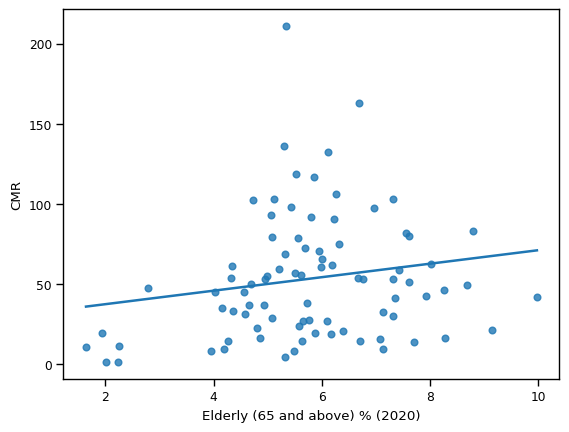

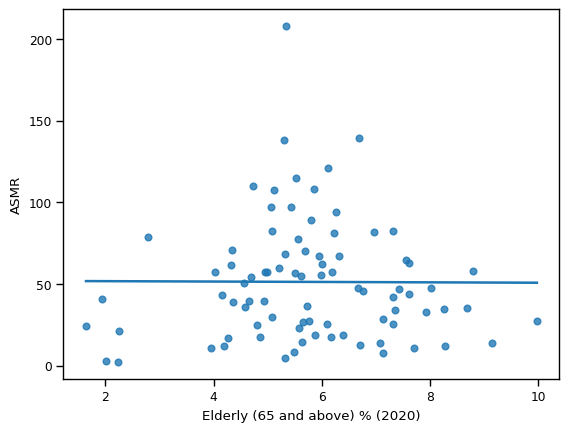

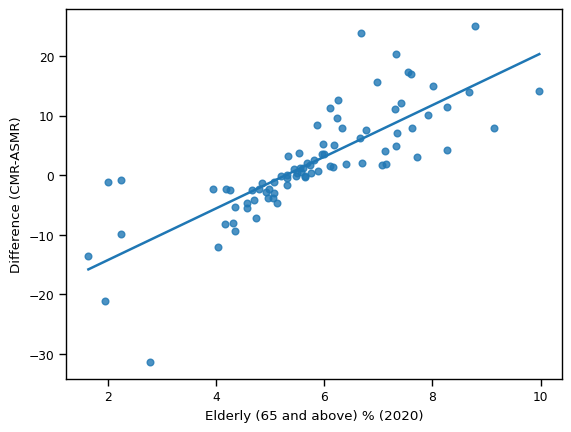

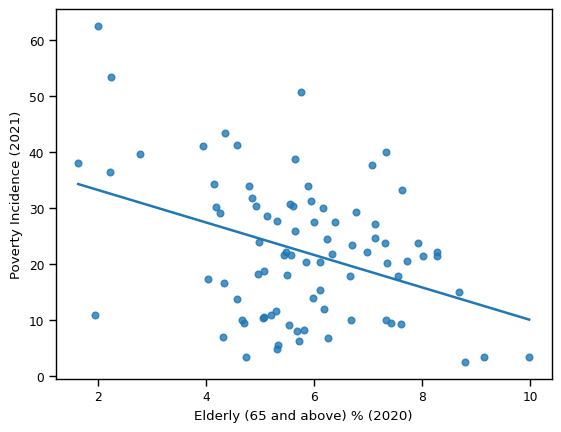

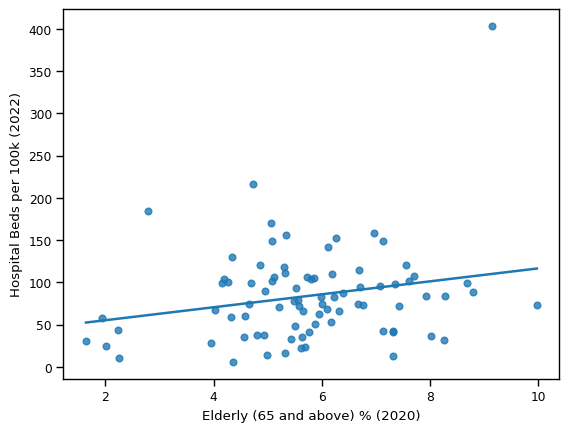

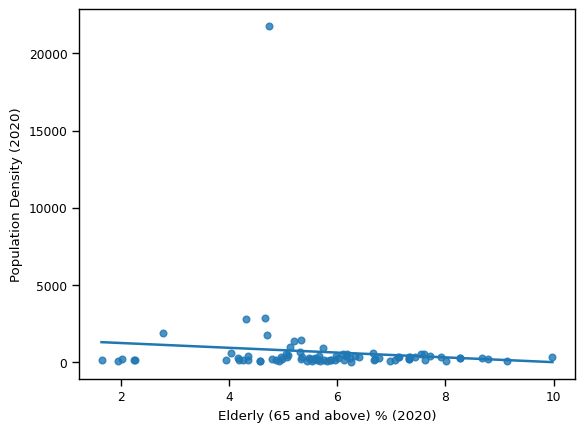

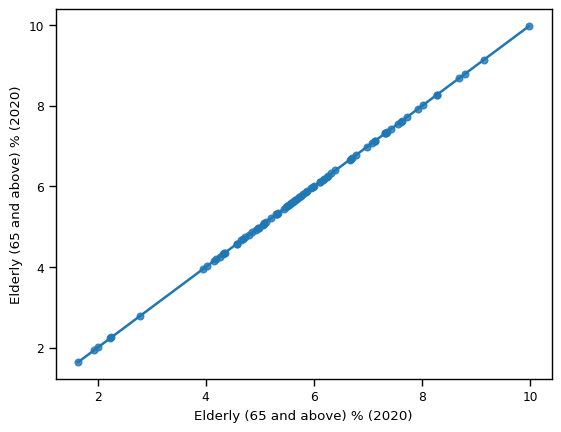

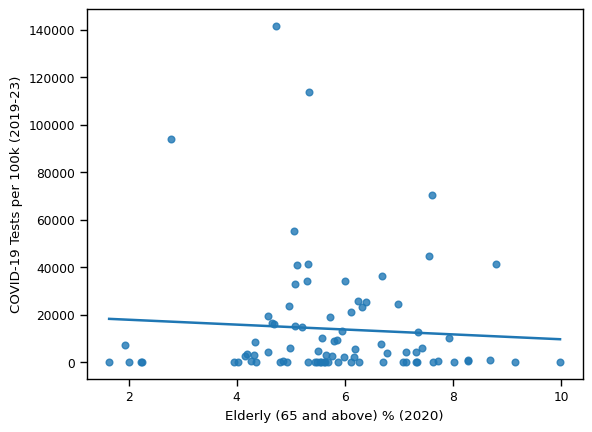

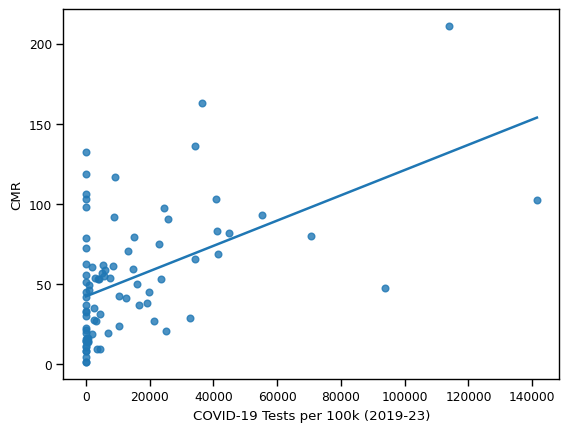

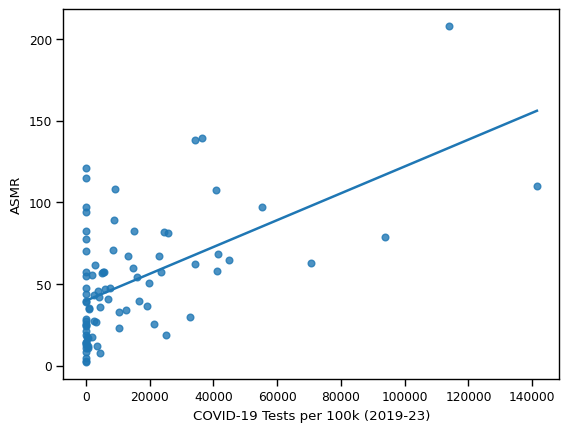

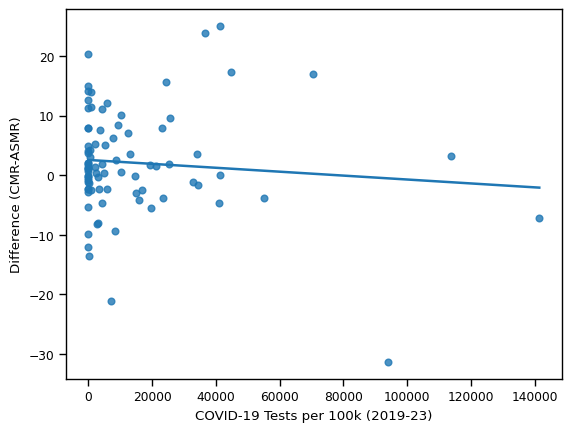

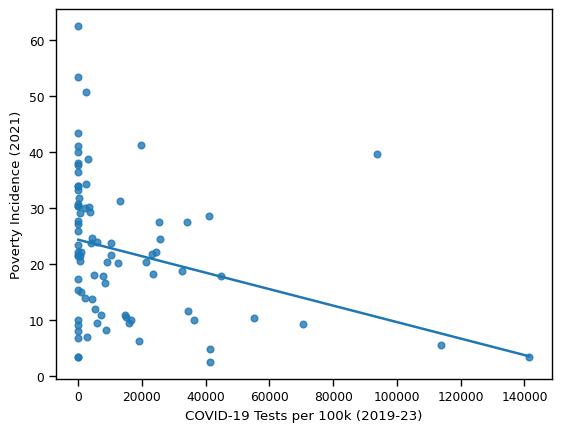

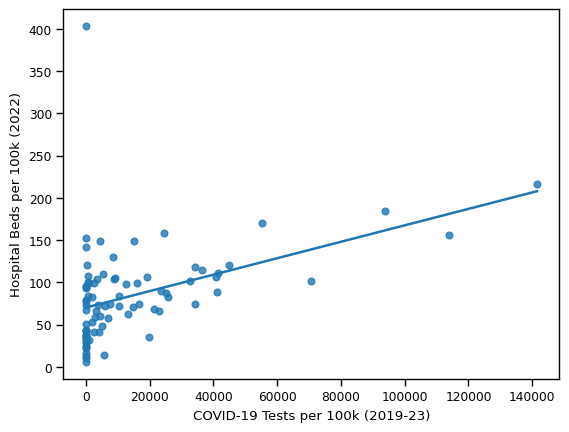

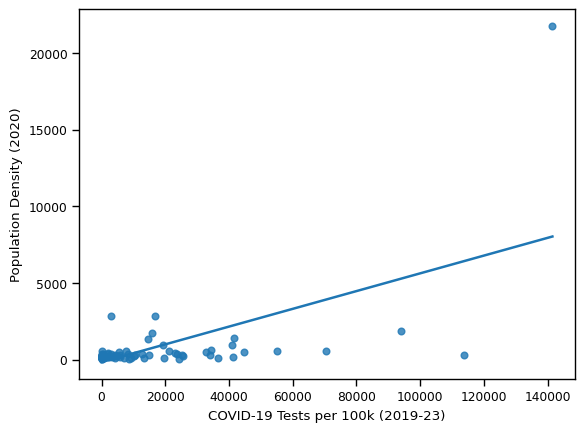

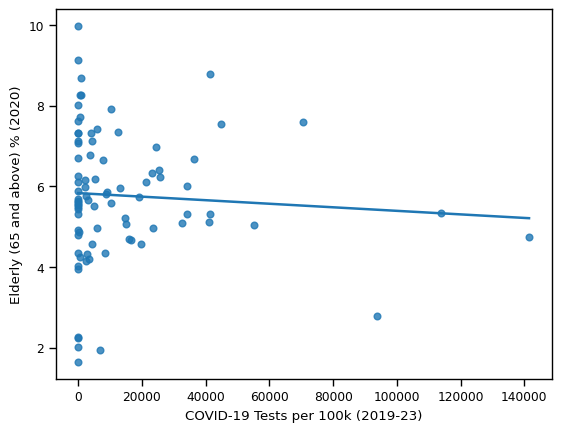

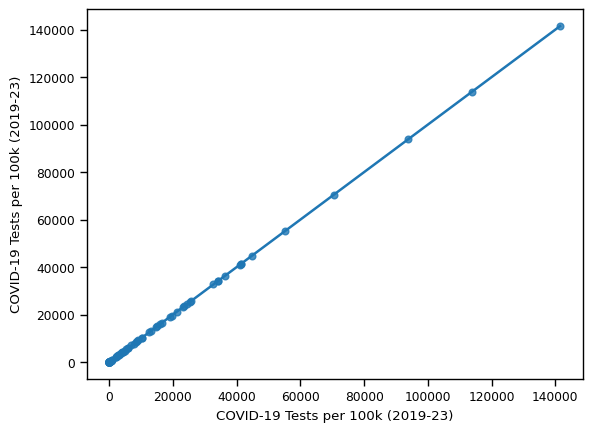

In [44]:
for row in mr.columns:
    for col in mr.columns:
        plt.figure() 
        sns.regplot(data=mr, x=row, y=col, ci=None)
        plt.savefig("../results/correlation_v2/%s-%s.png" % (row, col), bbox_inches ="tight")

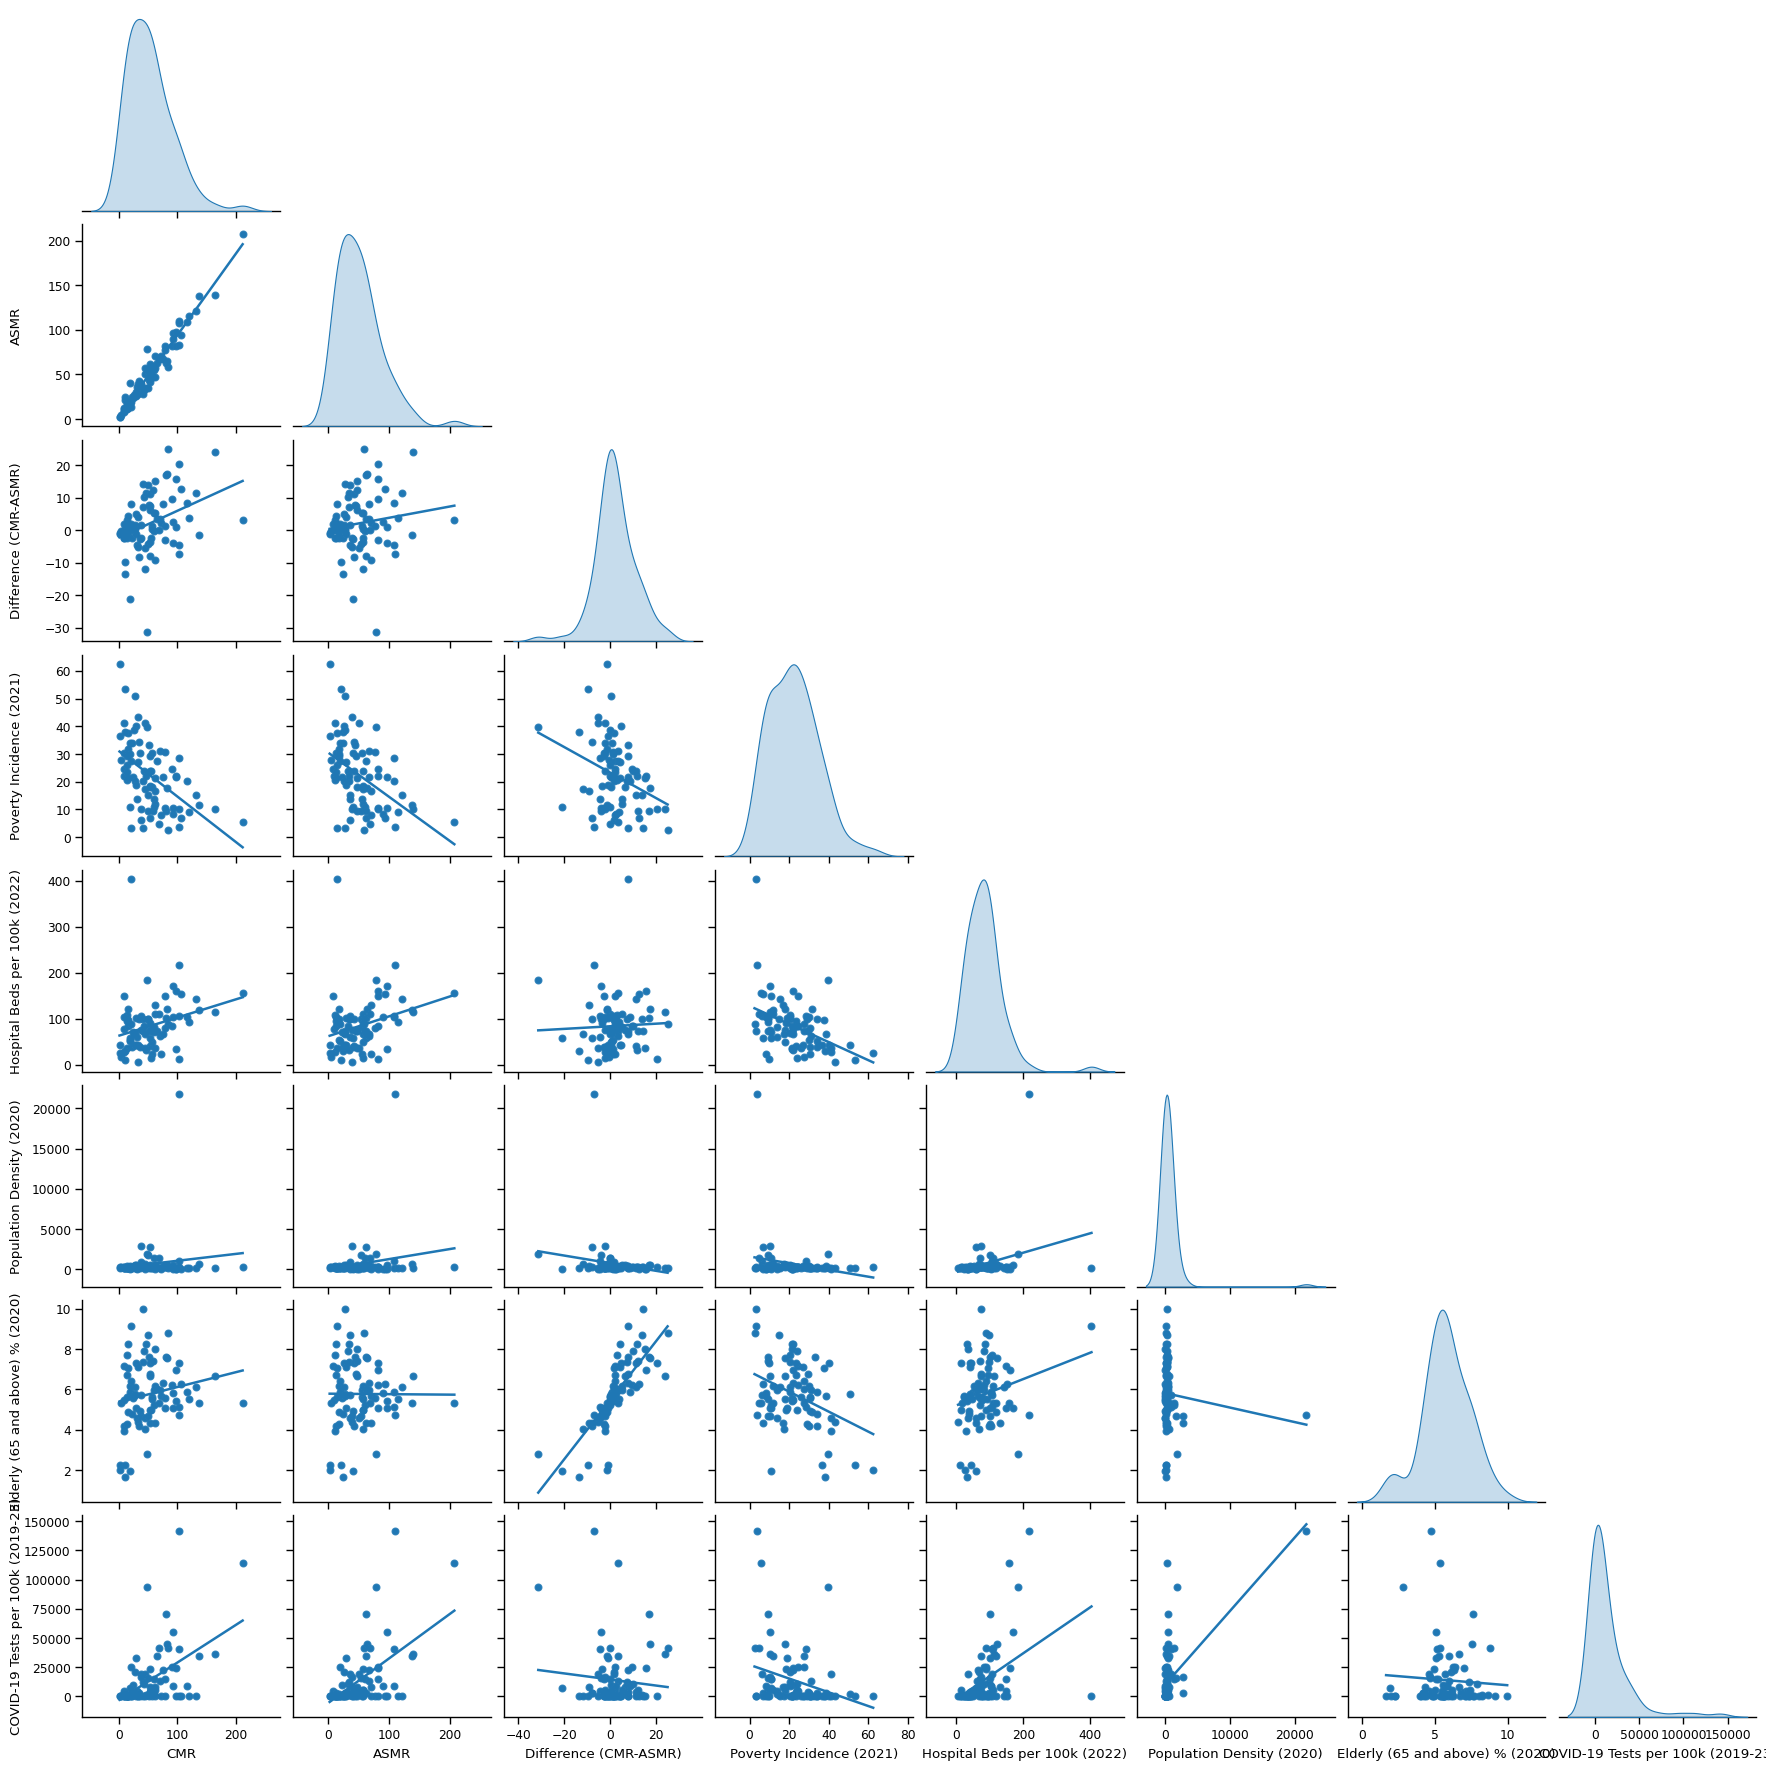

In [45]:
# Reference: https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.pairplot(mr, corner=True, diag_kind="kde", height=2.25)
# g = sns.PairGrid(mr, corner=True)
# g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot, ci=None)

# Reference: https://stackoverflow.com/questions/39961147/how-to-align-y-labels-in-a-seaborn-pairgrid
for ax in g.axes[:,0]:
    ax.get_yaxis().set_label_coords(-0.3,0.5)

# Saving Figure 
plt.savefig("../results/correlation_v2/correlation_pairplot.png", bbox_inches ="tight")

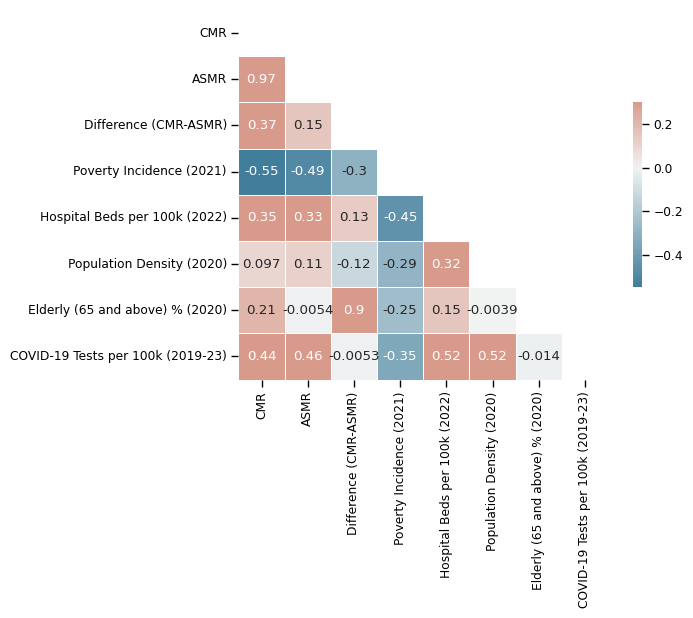

In [46]:
# Compute the correlation matrix
corr = correlation

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots()#figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.savefig("../results/correlation_v2/correlation_heatmap.png", bbox_inches ="tight")

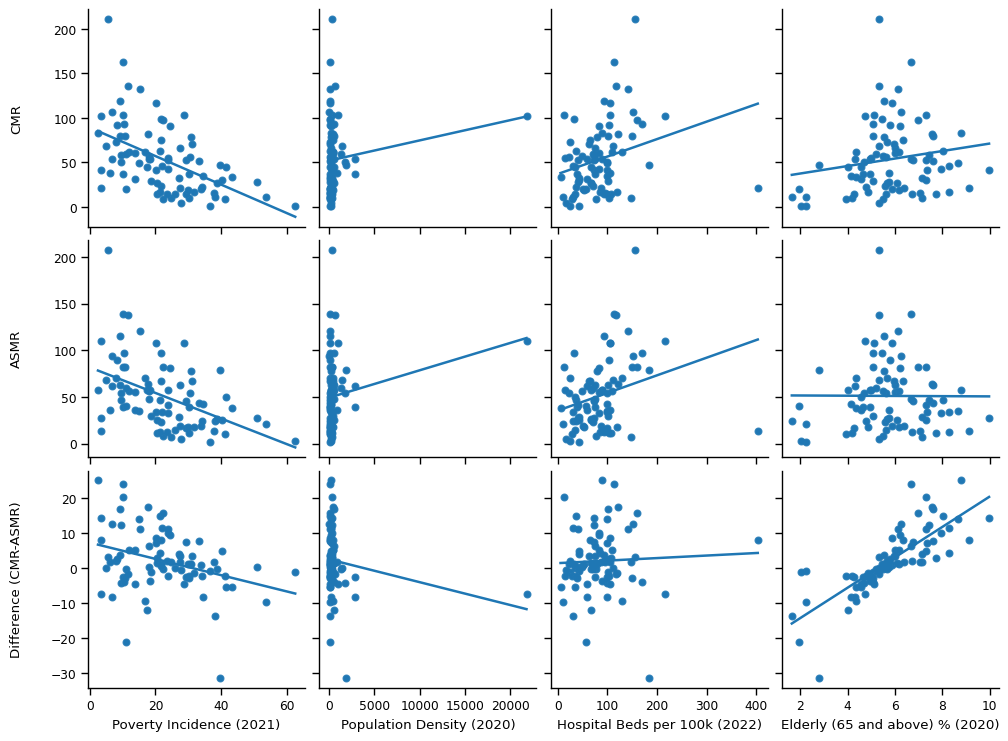

In [47]:
# g = sns.pairplot(mr, diag_kind="kde", corner=True, height=2)
# g.map_lower(sns.regplot, ci=None)

g = sns.pairplot(
    mr,
    x_vars=["Poverty Incidence (2021)", "Population Density (2020)", "Hospital Beds per 100k (2022)", "Elderly (65 and above) % (2020)"],
    y_vars=["CMR", "ASMR", "Difference (CMR-ASMR)"], 
    height=2.5
)
g.map(sns.regplot, ci=None)

# Reference: https://stackoverflow.com/questions/39961147/how-to-align-y-labels-in-a-seaborn-pairgrid
for ax in g.axes[:,0]:
    ax.get_yaxis().set_label_coords(-0.3,0.5)

# Saving Figure 
plt.savefig("../results/correlation_v2/correlation_subset.png", bbox_inches ="tight")

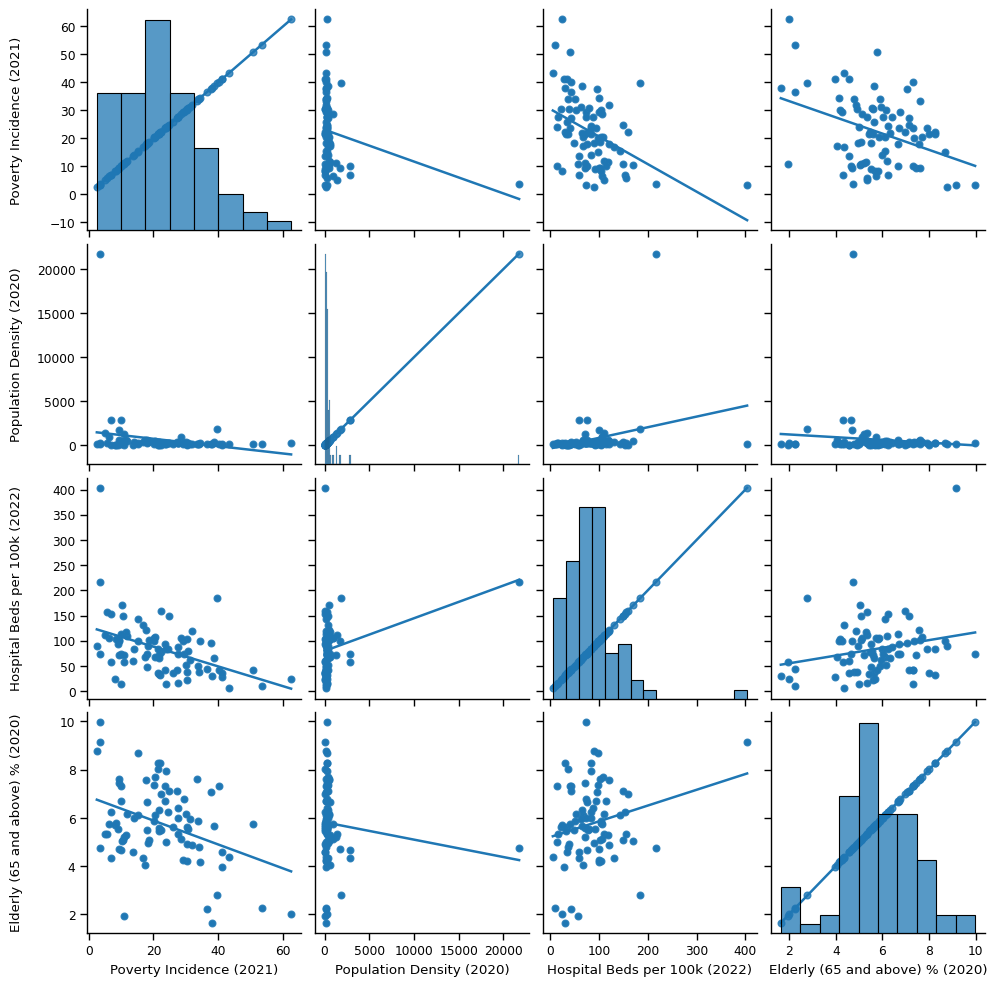

In [48]:
# g = sns.pairplot(mr, diag_kind="kde", corner=True, height=2)
# g.map_lower(sns.regplot, ci=None)
				
g = sns.pairplot(
    mr,
    x_vars=["Poverty Incidence (2021)", "Population Density (2020)", "Hospital Beds per 100k (2022)", "Elderly (65 and above) % (2020)"],
    y_vars=["Poverty Incidence (2021)", "Population Density (2020)", "Hospital Beds per 100k (2022)", "Elderly (65 and above) % (2020)"], 
    height=2.5
)
g.map(sns.regplot, ci=None)

# Reference: https://stackoverflow.com/questions/39961147/how-to-align-y-labels-in-a-seaborn-pairgrid
for ax in g.axes[:,0]:
    ax.get_yaxis().set_label_coords(-0.3,0.5)

# Saving Figure 
plt.savefig("../results/correlation_v2/correlation_subset_predictors.png", bbox_inches ="tight")

In [49]:
correlation.to_excel('../results/correlation_v2/spearman_correlation.xlsx')

### P-Values

In [50]:
# https://www.statology.org/p-value-correlation-pandas/
def r_pvalues(df):
    cols = pd.DataFrame(columns=df.columns)
    p = cols.transpose().join(cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = round(stats.pearsonr(tmp[r], tmp[c])[1], 4)
    return p

In [51]:
p = r_pvalues(mr)
p

,CMR,ASMR,Difference (CMR-ASMR),Poverty Incidence (2021),Hospital Beds per 100k (2022),Population Density (2020),Elderly (65 and above) % (2020),COVID-19 Tests per 100k (2019-23)
CMR,0.0,0.0,0.0007,0.0,0.0107,0.2036,0.1087,0.0
ASMR,0.0,0.0,0.1946,0.0,0.0089,0.0813,0.9617,0.0
Difference (CMR-ASMR),0.0007,0.1946,0.0,0.0024,0.6856,0.1094,0.0,0.4036
Poverty Incidence (2021),0.0,0.0,0.0024,0.0,0.0,0.0462,0.0004,0.0066
Hospital Beds per 100k (2022),0.0107,0.0089,0.6856,0.0,0.0,0.0104,0.0416,0.0
Population Density (2020),0.2036,0.0813,0.1094,0.0462,0.0104,0.0,0.3379,0.0
Elderly (65 and above) % (2020),0.1087,0.9617,0.0,0.0004,0.0416,0.3379,0.0,0.543
COVID-19 Tests per 100k (2019-23),0.0,0.0,0.4036,0.0066,0.0,0.0,0.543,0.0


In [52]:
p.to_excel('../results/correlation_v2/p-values.xlsx')